# USEFUL PANDAS TECHNIQUES IN PYTHON

""" We use dataset from 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'.
Dataset description: the data describes the length and width of two stages (setal and petal) of different species of flowers)."""

In [2]:
# Import Pandas package
import pandas as pd 

# 1- Load DataFrame

In [3]:
# Read the DataFrame by using pd.read_csv(): iris
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# Print the first few of iris file
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# 2- Overview of DataFrame

In [4]:
# Overview of our DataFrame iris
iris.info()
iris.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(150, 5)

# 3- Sorting and setting DataFrame

In [5]:
# sort iris by descending sepal_lenght
iris_sort = iris.sort_values("sepal_length",ascending = False)
print(iris_sort.head(5))

     sepal_length  sepal_width  petal_length  petal_width    species
131           7.9          3.8           6.4          2.0  virginica
135           7.7          3.0           6.1          2.3  virginica
122           7.7          2.8           6.7          2.0  virginica
117           7.7          3.8           6.7          2.2  virginica
118           7.7          2.6           6.9          2.3  virginica


In [6]:
# setting species colomn as the index
iris_ind = iris.set_index("species")
print(iris_ind)


           sepal_length  sepal_width  petal_length  petal_width
species                                                        
setosa              5.1          3.5           1.4          0.2
setosa              4.9          3.0           1.4          0.2
setosa              4.7          3.2           1.3          0.2
setosa              4.6          3.1           1.5          0.2
setosa              5.0          3.6           1.4          0.2
...                 ...          ...           ...          ...
virginica           6.7          3.0           5.2          2.3
virginica           6.3          2.5           5.0          1.9
virginica           6.5          3.0           5.2          2.0
virginica           6.2          3.4           5.4          2.3
virginica           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [7]:
# sorting by index values
iris_ind_sort = iris_ind.sort_index()
print(iris_ind_sort)

           sepal_length  sepal_width  petal_length  petal_width
species                                                        
setosa              5.1          3.5           1.4          0.2
setosa              4.9          3.0           1.4          0.2
setosa              4.7          3.2           1.3          0.2
setosa              4.6          3.1           1.5          0.2
setosa              5.0          3.6           1.4          0.2
...                 ...          ...           ...          ...
virginica           6.7          3.0           5.2          2.3
virginica           6.3          2.5           5.0          1.9
virginica           6.5          3.0           5.2          2.0
virginica           6.2          3.4           5.4          2.3
virginica           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


# 4- Missing values

In [8]:
# Finding missing values
iris.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [9]:
# Drop duplicates 
df_after_drop = iris.drop_duplicates("petal_length")
print("Before dropping duplicate:", iris.shape)
print("After dropping duplicate:", df_after_drop.shape)


Before dropping duplicate: (150, 5)
After dropping duplicate: (43, 5)


# 5- Aggregate

In [10]:
# Aggregate over sepal_length column
sepal_length_agg = iris["sepal_length"].agg(['min','max','sum'])
print(sepal_length_agg)

min      4.3
max      7.9
sum    876.5
Name: sepal_length, dtype: float64


In [11]:
# Aggregate over sepal_length per sepal_width and petal_width columns

iris.agg({'sepal_width' : ['median', 'min','max'], 'petal_width' : ['median','min', 'max']})

,sepal_width,petal_width
median,3.0,1.3
min,2.0,0.1
max,4.4,2.5


# 6- Gouped summary statistics

In [12]:
# groupe by species, calculate mean sepal_length,petal_length
length_group = iris_ind_sort.groupby("species")[["sepal_length","petal_length"]].mean()
print(length_group)

            sepal_length  petal_length
species                               
setosa             5.006         1.462
versicolor         5.936         4.260
virginica          6.588         5.552


In [13]:
# groupe by species, calculate mean sepal_width,petal_width
width_group = iris_ind_sort.groupby("species")[["sepal_width","petal_width"]].mean()
print(width_group)

            sepal_width  petal_width
species                             
setosa            3.428        0.246
versicolor        2.770        1.326
virginica         2.974        2.026


# 7- Plotting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92bd746150>,
      dtype=object)

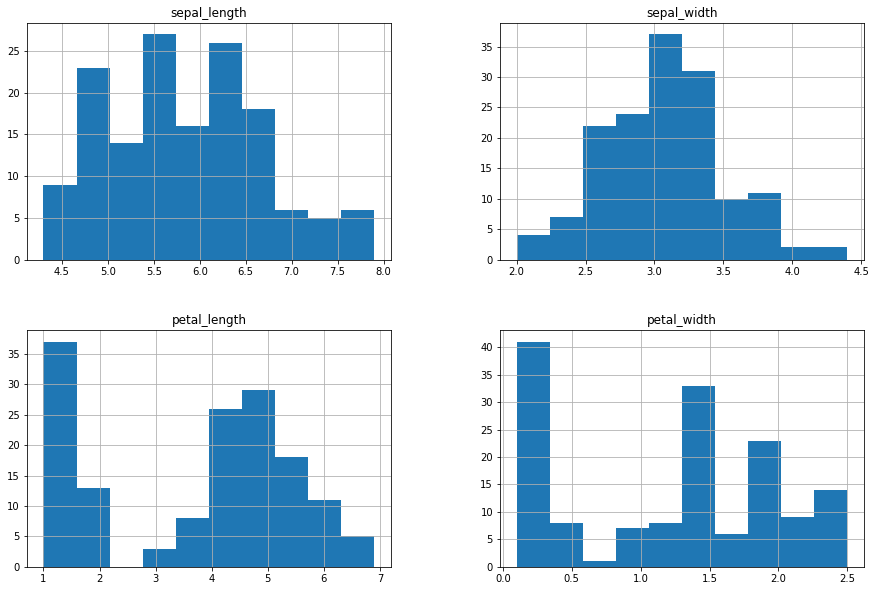

In [16]:
iris_sort.hist( figsize=(15, 10))